In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
marker_types = ['o', 's', '^', 'D', 'v']
season_order = ["NDJ", "FMA", "MJ", "JAS"]
font_labels = {'family': 'Arial', 'color': 'black', 'size': 14}
font_titles = {'family': 'Arial', 'color': 'black', 'size': 16}
# grouped bar chart
bar_width = 0.15
x = np.arange(len(season_order))


In [10]:
csv_path = './final_part_2_data.csv'
litter_df = pd.read_csv(csv_path)

In [4]:
litter_df

,Tree species,elevation,C,C std. err,N,N std. Err,P,P std. Err,Litter Mass Loss,K,K std. Err,C Release,C rel std. err,N Release,N rel std. err,P Release,P rel std. err
0,Alnus nepalensis D. Don,1300,37.93,0.39,2.32,0.10,0.74,0.03,75,1.42,0.13,80.54,2.59,66.46,5.52,96.51,0.66
1,Engelhardia spicata Lesch. Ex Blume.,1500,37.83,0.42,1.35,0.14,0.50,0.03,61,0.88,0.03,64.54,0.82,27.92,9.44,89.77,0.31
2,Castanopsis tribuloides (Sm.) A. DC.,1700,37.44,0.36,1.98,0.19,0.49,0.02,58,0.87,0.02,67.96,1.33,53.70,6.27,87.30,0.57
3,Eurya acuminata DC.,1900,37.89,0.06,1.86,0.08,0.39,0.03,43,0.66,0.01,56.05,0.58,37.53,3.48,87.40,1.24
4,Schima wallichii,1900,36.33,0.60,1.36,0.06,0.66,0.03,48,0.64,0.04,52.03,3.89,16.43,0.91,91.65,0.61
5,Rhododendron arboreum Sm.,2100,37.66,0.35,1.27,0.07,0.23,0.03,44,0.59,0.02,50.62,0.87,26.84,3.53,70.67,3.38
6,Quercus semecarpifolia Sm.,2300,36.70,0.07,1.33,0.08,0.44,0.01,41,0.60,0.02,47.65,1.73,35.59,3.43,85.78,0.46
7,Pinus roxburghii Sarg.,2300,37.16,0.19,1.07,0.02,0.35,0.05,45,0.53,0.02,45.23,0.96,23.00,1.01,77.69,2.54
8,Lyonia ovalifolia (Wall.) Drude,2500,37.11,0.55,1.20,0.01,0.32,0.01,47,0.63,0.02,51.65,1.09,21.39,4.31,82.29,0.42


Index(['Tree species', 'elevation', 'C', 'C std. err', 'N', 'N std. Err', 'P',
       'P std. Err', 'Litter Mass Loss', 'K', 'K std. Err', 'C Release',
       'C rel std. err', 'N Release', 'N rel std. err', 'P Release',
       'P rel std. err', 'C:N', 'C:P', 'N:P'],
      dtype='object')

In [5]:
litter_df['C:N'] = litter_df['C'] / litter_df['N']
litter_df['C:P'] = litter_df['C'] / litter_df['P']
litter_df['N:P'] = litter_df['N'] / litter_df['P']

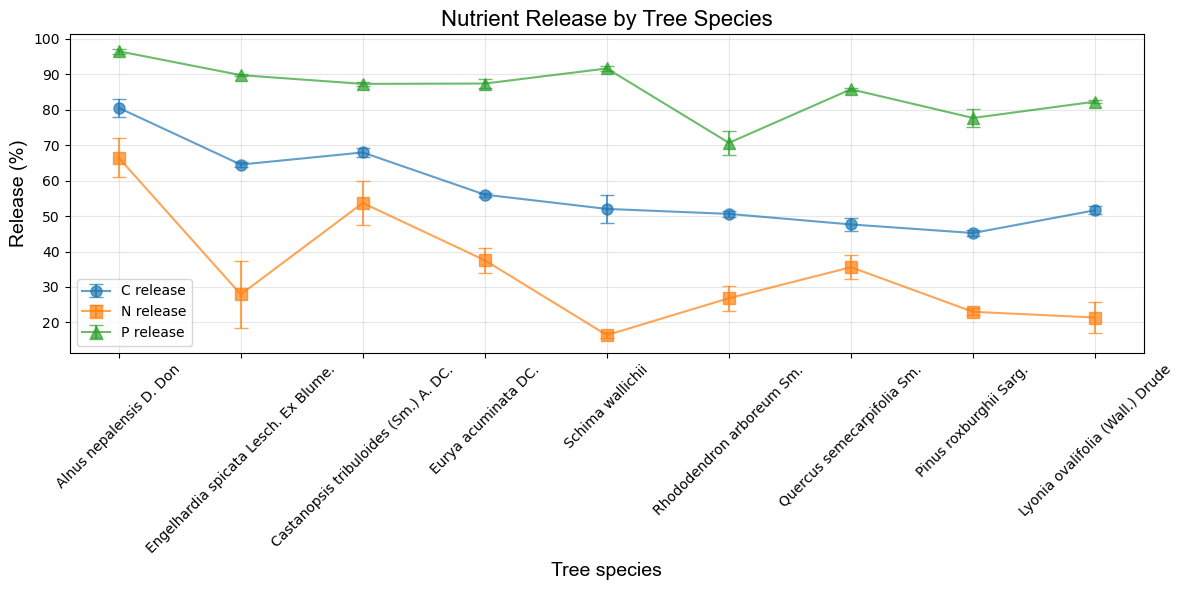

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create line plots for each release type with different colors, marker types, and error bars
ax.errorbar(litter_df['Tree species'], litter_df['C\xa0Release'], yerr=litter_df['C rel std. err'], label='C release', marker=marker_types[0], alpha=0.7, markersize=8, capsize=5)
ax.errorbar(litter_df['Tree species'], litter_df['N\xa0Release'], yerr=litter_df['N rel std. err'], label='N release', marker=marker_types[1], alpha=0.7, markersize=8, capsize=5)
ax.errorbar(litter_df['Tree species'], litter_df['P\xa0Release'], yerr=litter_df['P rel std. err'], label='P release', marker=marker_types[2], alpha=0.7, markersize=8, capsize=5)

ax.set_xlabel('Tree species', fontdict=font_labels)
ax.set_ylabel('Release (%)', fontdict=font_labels)
ax.set_title('Nutrient Release by Tree Species', fontdict=font_titles)
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

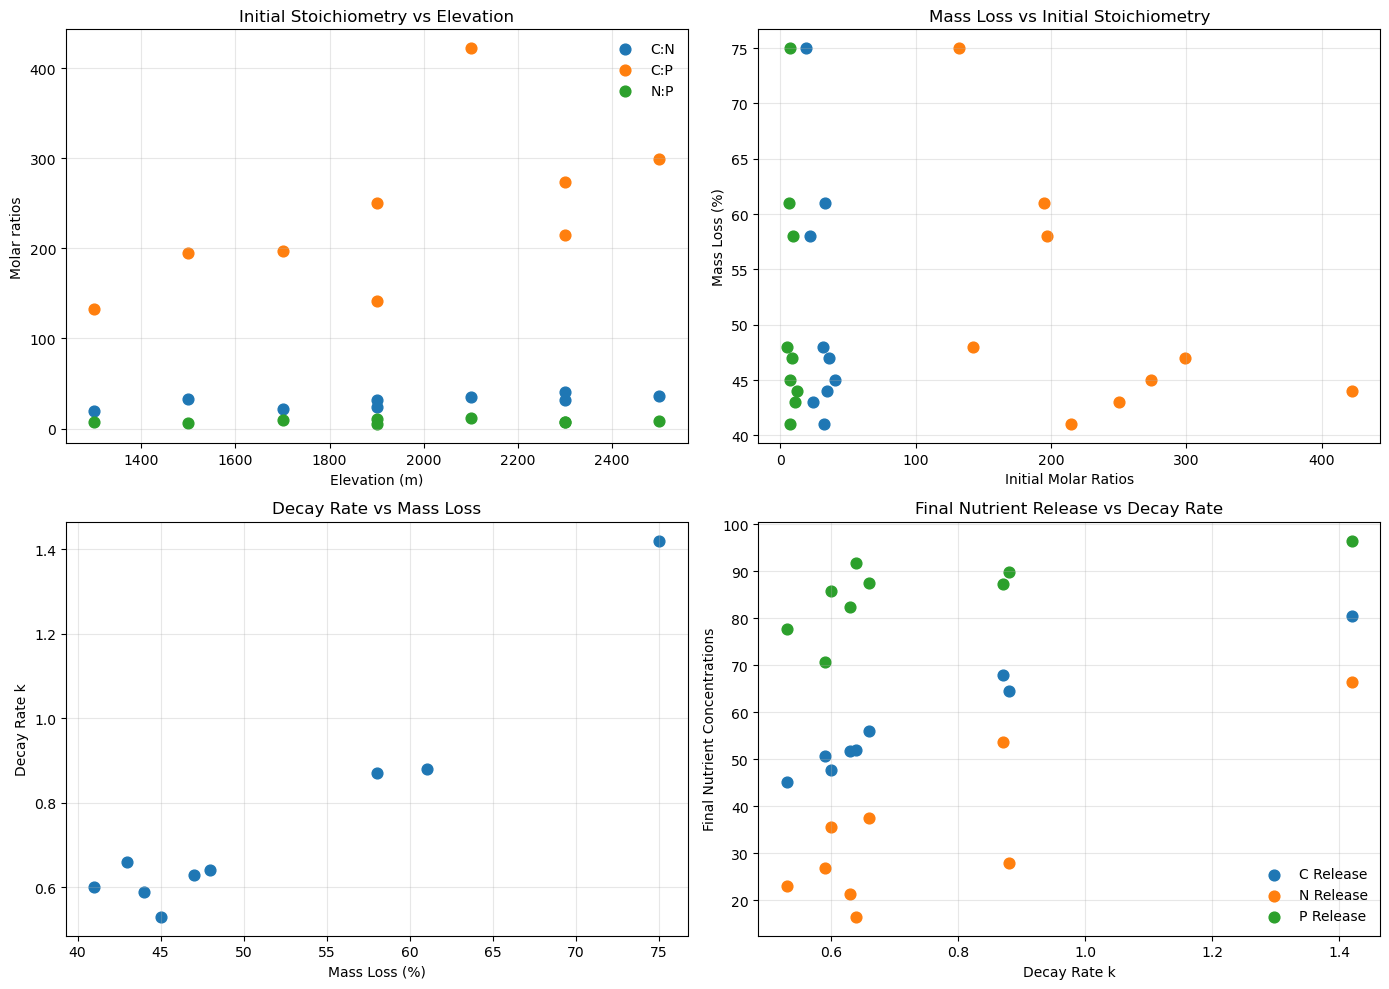

In [18]:
# ----------------------------------------------------
# Stoichiometry (molar)
# ----------------------------------------------------
AW_C = 12.011
AW_N = 14.007
AW_P = 30.974

litter_df["mol_C"] = litter_df["C"] / AW_C
litter_df["mol_N"] = litter_df["N"] / AW_N
litter_df["mol_P"] = litter_df["P"] / AW_P

litter_df["C_N_molar"] = litter_df["mol_C"] / litter_df["mol_N"]
litter_df["C_P_molar"] = litter_df["mol_C"] / litter_df["mol_P"]
litter_df["N_P_molar"] = litter_df["mol_N"] / litter_df["mol_P"]

# ----------------------------------------------------
# Figure layout
# ----------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax1, ax2, ax3, ax4 = axes.flatten()

# ----------------------------------------------------
# Panel 1 — Elevation vs Initial Stoichiometry
# ----------------------------------------------------
ax1.scatter(litter_df["elevation"], litter_df["C_N_molar"], label="C:N", s=60)
ax1.scatter(litter_df["elevation"], litter_df["C_P_molar"], label="C:P", s=60)
ax1.scatter(litter_df["elevation"], litter_df["N_P_molar"], label="N:P", s=60)

ax1.set_xlabel("Elevation (m)")
ax1.set_ylabel("Molar ratios")
ax1.set_title("Initial Stoichiometry vs Elevation")
ax1.legend(frameon=False)

# ----------------------------------------------------
# Panel 2 — Stoichiometry vs Percent Mass Loss
# ----------------------------------------------------
ax2.scatter(litter_df["C_N_molar"], litter_df["Litter Mass Loss"], label="C:N", s=60)
ax2.scatter(litter_df["C_P_molar"], litter_df["Litter Mass Loss"], label="C:P", s=60)
ax2.scatter(litter_df["N_P_molar"], litter_df["Litter Mass Loss"], label="N:P", s=60)

ax2.set_xlabel("Initial Molar Ratios")
ax2.set_ylabel("Mass Loss (%)")
ax2.set_title("Mass Loss vs Initial Stoichiometry")

# ----------------------------------------------------
# Panel 3 — Percent Mass Loss vs Decay Rate k
# ----------------------------------------------------
ax3.scatter(litter_df["Litter Mass Loss"], litter_df["K"], s=60)
ax3.set_xlabel("Mass Loss (%)")
ax3.set_ylabel("Decay Rate k")
ax3.set_title("Decay Rate vs Mass Loss")

# ----------------------------------------------------
# Panel 4 — Decay Rate k vs Final Nutrient Release
# ----------------------------------------------------
ax4.scatter(litter_df["K"], litter_df['C\xa0Release'], label="C Release", s=60)
ax4.scatter(litter_df["K"], litter_df["N\xa0Release"], label="N Release", s=60)
ax4.scatter(litter_df["K"], litter_df["P\xa0Release"], label="P Release", s=60)

ax4.set_xlabel("Decay Rate k")
ax4.set_ylabel("Final Nutrient Concentrations")
ax4.set_title("Final Nutrient Release vs Decay Rate")
ax4.legend(frameon=False)

# ----------------------------------------------------
# Styling and tight layout
# ----------------------------------------------------
for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
